In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


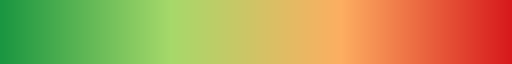

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4'
subfolder_PL = glob.glob(cwd + '/quinine**PL**')
subfolder_PL.sort()
subfolder_Abs = glob.glob(cwd + '/quinine**Abs**')
subfolder_Abs.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder_PL, sep = '\n')  ## Print one element per line
print(*subfolder_Abs, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_1E-4M_300ms_PL_20230802-164522_8893342e.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_1E-4M_400ms_PL_20230802-172345_50db5e60.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_1E-4M_500ms_PL_20230802-173408_09b42f42.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_2E-4M_300ms_PL_20230802-165108_211148e0.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_2E-4M_400ms_PL_20230802-172631_06f28914.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [6]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df = pd.DataFrame()

for i in range(len(subfolder_PL)):
    data_files = subfolder_PL
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder_PL[i])
    id0 = 8
    id1 = 22

    skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8
    # df_temp = pd.DataFrame()
    
    # for j in range(len(data_files)):        
    #     df = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
    #     df_temp = pd.concat([df_temp, df[f'{suffix[id0:id1]}'], axis=1, ignore_index=False)
    #     df_int = pd.concat([df_int, df[f'{suffix[id0:id1]}']], axis=1, ignore_index=False)
    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df[f'{suffix[id0:id1]}'] = df_temp['Fluorescence']
    

In [7]:
df

x_1E-4M_300ms_PL  1E-4M_300ms_PL  x_1E-4M_400ms_PL  1E-4M_400ms_PL  \
0           197.742294        1.416667        197.742294        1.875000   
1           198.544478        1.638889        198.544478        0.569444   
2           199.346597        1.083333        199.346597        0.791667   
3           200.148650        0.694444        200.148650        1.125000   
4           200.950637        0.583333        200.950637        0.347222   
...                ...             ...               ...             ...   
1039        990.769837        0.861111        990.769837        0.097222   
1040        991.489165        2.805556        991.489165        1.208333   
1041        992.208398        1.916667        992.208398        2.791667   
1042        992.927537        3.416667        992.927537        2.319444   
1043        993.646582        2.138889        993.646582        0.125000   

      x_1E-4M_500ms_PL  1E-4M_500ms_PL  x_2E-4M_300ms_PL  2E-4M_300ms_PL  \
0           197.742294        3.444444        197.742294        1.125000   
1           198.544478        0.555556        198.544478        1.791667   
2           199.346597        2.000000        199.346597        0.208333   
3           200.148650        3.000000        200.148650        1.541667   
4           200.950637        6.222222        200.950637        1.986111   
...                ...             ...               ...             ...   
1039        990.769837        0.000000        990.769837        0.236111   
1040        991.489165        4.555556        991.489165        1.097222   
1041        992.208398        1.444444        992.208398        2.430556   
1042        992.927537        1.777778        992.927537        3.013889   
1043        993.646582        3.666667        993.646582        0.652778   

      x_2E-4M_400ms_PL  2E-4M_400ms_PL  x_2E-4M_500ms_PL  2E-4M_500ms_PL  \
0           197.742294        2.902778        197.742294        3.152778   
1           198.544478        0.763889        198.544478        0.958333   
2           199.346597        2.652778        199.346597        2.263889   
3           200.148650        1.097222        200.148650        2.375000   
4           200.950637        0.791667        200.950637        3.958333   
...                ...             ...               ...             ...   
1039        990.769837        0.902778        990.769837        2.708333   
1040        991.489165        1.013889        991.489165        2.625000   
1041        992.208398        1.652778        992.208398        1.180556   
1042        992.927537        3.569444        992.927537        0.375000   
1043        993.646582        1.319444        993.646582        3.402778   

      x_5E-4M_300ms_PL  5E-4M_300ms_PL  x_5E-4M_400ms_PL  5E-4M_400ms_PL  \
0           197.742294        3.763889        197.742294        1.986111   
1           198.544478        0.986111        198.544478        0.319444   
2           199.346597        0.013889        199.346597        0.902778   
3           200.148650        2.013889        200.148650        0.902778   
4           200.950637        3.680556        200.950637        3.097222   
...                ...             ...               ...             ...   
1039        990.769837        0.319444        990.769837        2.763889   
1040        991.489165        2.902778        991.489165        0.541667   
1041        992.208398        0.902778        992.208398        2.458333   
1042        992.927537        2.319444        992.927537        1.875000   
1043        993.646582        1.236111        993.646582        0.458333   

      x_5E-4M_500ms_PL  5E-4M_500ms_PL  
0           197.742294        3.527778  
1           198.544478        0.805556  
2           199.346597        1.305556  
3           200.148650        2.416667  
4           200.950637        9.805556  
...                ...             ...  
1039        990.769837        1.416667  
1040        991.489165    

## Check data in pd dataframe

In [8]:
df.keys()

Index(['x_1E-4M_300ms_PL', '1E-4M_300ms_PL', 'x_1E-4M_400ms_PL',
       '1E-4M_400ms_PL', 'x_1E-4M_500ms_PL', '1E-4M_500ms_PL',
       'x_2E-4M_300ms_PL', '2E-4M_300ms_PL', 'x_2E-4M_400ms_PL',
       '2E-4M_400ms_PL', 'x_2E-4M_500ms_PL', '2E-4M_500ms_PL',
       'x_5E-4M_300ms_PL', '5E-4M_300ms_PL', 'x_5E-4M_400ms_PL',
       '5E-4M_400ms_PL', 'x_5E-4M_500ms_PL', '5E-4M_500ms_PL'],
      dtype='object')

In [9]:
df.shape

(1044, 18)

## Prepare keys for average scans in pd dataframe

In [10]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_1E-4M_300ms_PL',
 '1E-4M_300ms_PL',
 'x_1E-4M_400ms_PL',
 '1E-4M_400ms_PL',
 'x_1E-4M_500ms_PL',
 '1E-4M_500ms_PL',
 'x_2E-4M_300ms_PL',
 '2E-4M_300ms_PL',
 'x_2E-4M_400ms_PL',
 '2E-4M_400ms_PL',
 'x_2E-4M_500ms_PL',
 '2E-4M_500ms_PL',
 'x_5E-4M_300ms_PL',
 '5E-4M_300ms_PL',
 'x_5E-4M_400ms_PL',
 '5E-4M_400ms_PL',
 'x_5E-4M_500ms_PL',
 '5E-4M_500ms_PL']

In [11]:
title = [os.path.basename(subfolder_PL[i]) for i in range(len(subfolder_PL))]
print(*title, sep='\n')

label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label2 = ['300ms', '400ms', '500ms']
         # 'ZnI2 128 uL/min']

quinine_1E-4M_300ms_PL_20230802-164522_8893342e.csv
quinine_1E-4M_400ms_PL_20230802-172345_50db5e60.csv
quinine_1E-4M_500ms_PL_20230802-173408_09b42f42.csv
quinine_2E-4M_300ms_PL_20230802-165108_211148e0.csv
quinine_2E-4M_400ms_PL_20230802-172631_06f28914.csv
quinine_2E-4M_500ms_PL_20230802-173643_a63544b0.csv
quinine_5E-4M_300ms_PL_20230802-165414_06a0fa5e.csv
quinine_5E-4M_400ms_PL_20230802-172843_fb6c7b8b.csv
quinine_5E-4M_500ms_PL_20230802-173834_58463f82.csv


## Plot PL scans together

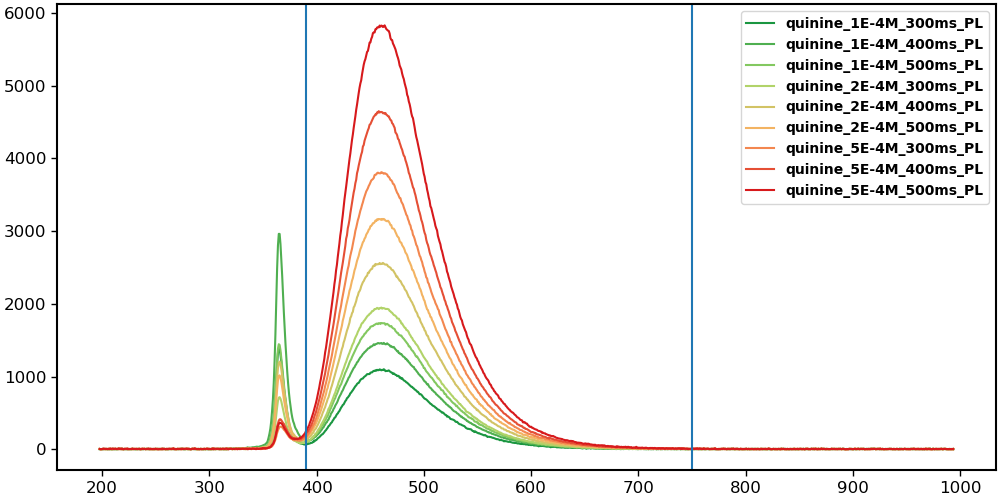

In [12]:
f1, ax1 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

ax1.axvline(w0)
ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [13]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [14]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i][:-4] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

Data_source  Simpson_integrate
0  quinine_1E-4M_300ms_PL_20230802-164522_8893342e      110214.117149
1  quinine_1E-4M_400ms_PL_20230802-172345_50db5e60      147919.371754
2  quinine_1E-4M_500ms_PL_20230802-173408_09b42f42      175234.503876
3  quinine_2E-4M_300ms_PL_20230802-165108_211148e0      196360.187931
4  quinine_2E-4M_400ms_PL_20230802-172631_06f28914      258291.477508
5  quinine_2E-4M_500ms_PL_20230802-173643_a63544b0      319874.038718
6  quinine_5E-4M_300ms_PL_20230802-165414_06a0fa5e      384497.353746
7  quinine_5E-4M_400ms_PL_20230802-172843_fb6c7b8b      468572.508100
8  quinine_5E-4M_500ms_PL_20230802-173834_58463f82      588011.299460

## Save Simpson integrate of PL peak

In [15]:
# df_int.to_csv(os.path.join(new_dir, 'simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [16]:
# df_int.to_csv('050mM_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [17]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
df21 = pd.DataFrame()

for i in range(len(subfolder_Abs)):
    data_files = subfolder_Abs
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder_Abs[i])
    id0 = 8
    id1 = 22

    skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8
    df_temp = pd.DataFrame()
    
    # for j in range(len(data_files)):        
    #     df = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
    #     df_temp = pd.concat([df_temp, df[f'{suffix[id0:id1]}'], axis=1, ignore_index=False)
    #     df_int = pd.concat([df_int, df[f'{suffix[id0:id1]}']], axis=1, ignore_index=False)
    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df2[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df2[f'{suffix[id0:id1]}'] = df_temp['Absorbance']
    
    df21[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df21[f'{suffix[id0:id1]}'] = df_temp['Sample']
    

In [18]:
df2

x_1E-4M_300ms_Ab  1E-4M_300ms_Ab  x_1E-4M_400ms_Ab  1E-4M_400ms_Ab  \
0           197.742294       -0.139554        197.742294       -0.280119   
1           198.544478       -0.036429        198.544478       -0.386382   
2           199.346597       -0.164546        199.346597       -0.344974   
3           200.148650       -0.203365        200.148650       -0.329754   
4           200.950637       -0.121569        200.950637        0.172515   
...                ...             ...               ...             ...   
1039        990.769837       -0.211776        990.769837       -0.039226   
1040        991.489165       -0.149846        991.489165       -0.506239   
1041        992.208398       -0.046661        992.208398             NaN   
1042        992.927537        0.031258        992.927537             NaN   
1043        993.646582             NaN        993.646582       -0.474817   

      x_1E-4M_500ms_Ab  1E-4M_500ms_Ab  x_2E-4M_300ms_Ab  2E-4M_300ms_Ab  \
0           197.742294        0.973313        197.742294       -0.130078   
1           198.544478        1.081138        198.544478        0.009760   
2           199.346597        1.027683        199.346597       -0.142668   
3           200.148650        0.967011        200.148650       -0.124939   
4           200.950637        0.351032        200.950637        0.072185   
...                ...             ...               ...             ...   
1039        990.769837        0.113019        990.769837       -0.157635   
1040        991.489165        1.268445        991.489165       -0.115453   
1041        992.208398             NaN        992.208398        0.069636   
1042        992.927537        1.752989        992.927537        0.085011   
1043        993.646582        3.086868        993.646582             NaN   

      x_2E-4M_400ms_Ab  2E-4M_400ms_Ab  x_2E-4M_500ms_Ab  2E-4M_500ms_Ab  \
0           197.742294        0.369216        197.742294        0.518461   
1           198.544478        0.120574        198.544478        0.548836   
2           199.346597        0.074382        199.346597        0.531687   
3           200.148650        0.170559        200.148650        0.527868   
4           200.950637        0.577742        200.950637        0.380523   
...                ...             ...               ...             ...   
1039        990.769837        0.157486        990.769837        0.025372   
1040        991.489165        0.134979        991.489165        0.589611   
1041        992.208398        0.410174        992.208398        0.819061   
1042        992.927537        0.808114        992.927537        0.636179   
1043        993.646582        0.243038        993.646582        0.672850   

      x_5E-4M_300ms_Ab  5E-4M_300ms_Ab  x_5E-4M_400ms_Ab  5E-4M_400ms_Ab  \
0           197.742294       -0.154298        197.742294        0.225421   
1           198.544478       -0.049541        198.544478        0.053007   
2           199.346597       -0.196386        199.346597        0.017959   
3           200.148650       -0.165508        200.148650        0.065480   
4           200.950637        0.197051        200.950637        0.568298   
...                ...             ...               ...             ...   
1039        990.769837       -0.199618        990.769837        0.041670   
1040        991.489165       -0.142185        991.489165        0.039331   
1041        992.208398       -0.067808        992.208398        0.342121   
1042        992.927537        0.177905        992.927537        0.681241   
1043        993.646582             NaN        993.646582        0.094976   

      x_5E-4M_500ms_Ab  5E-4M_500ms_Ab  
0           197.742294        0.533867  
1           198.544478        0.548836  
2           199.346597        0.514061  
3           200.148650        0.526653  
4           200.950637        0.514917  
...                ...             ...  
1039        990.769837        0.025617  
1040        991.489165    

## Prepare keys for average scans in pd dataframe

In [19]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_1E-4M_300ms_Ab',
 '1E-4M_300ms_Ab',
 'x_1E-4M_400ms_Ab',
 '1E-4M_400ms_Ab',
 'x_1E-4M_500ms_Ab',
 '1E-4M_500ms_Ab',
 'x_2E-4M_300ms_Ab',
 '2E-4M_300ms_Ab',
 'x_2E-4M_400ms_Ab',
 '2E-4M_400ms_Ab',
 'x_2E-4M_500ms_Ab',
 '2E-4M_500ms_Ab',
 'x_5E-4M_300ms_Ab',
 '5E-4M_300ms_Ab',
 'x_5E-4M_400ms_Ab',
 '5E-4M_400ms_Ab',
 'x_5E-4M_500ms_Ab',
 '5E-4M_500ms_Ab']

In [20]:
title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
print(*title, sep='\n')

label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label2 = ['300ms', '400ms', '500ms']
         # 'ZnI2 128 uL/min']

quinine_1E-4M_300ms_Abs_20230802-164205_b7ec46a3.csv
quinine_1E-4M_400ms_Abs_20230802-172331_7fc23daf.csv
quinine_1E-4M_500ms_Abs_20230802-173342_d6d4df4a.csv
quinine_2E-4M_300ms_Abs_20230802-165017_a3326354.csv
quinine_2E-4M_400ms_Abs_20230802-172621_e708e5a6.csv
quinine_2E-4M_500ms_Abs_20230802-173631_d533d48b.csv
quinine_5E-4M_300ms_Abs_20230802-165400_be41df07.csv
quinine_5E-4M_400ms_Abs_20230802-172833_4090a498.csv
quinine_5E-4M_500ms_Abs_20230802-173823_b5572a8a.csv


## Plot Abs scans together

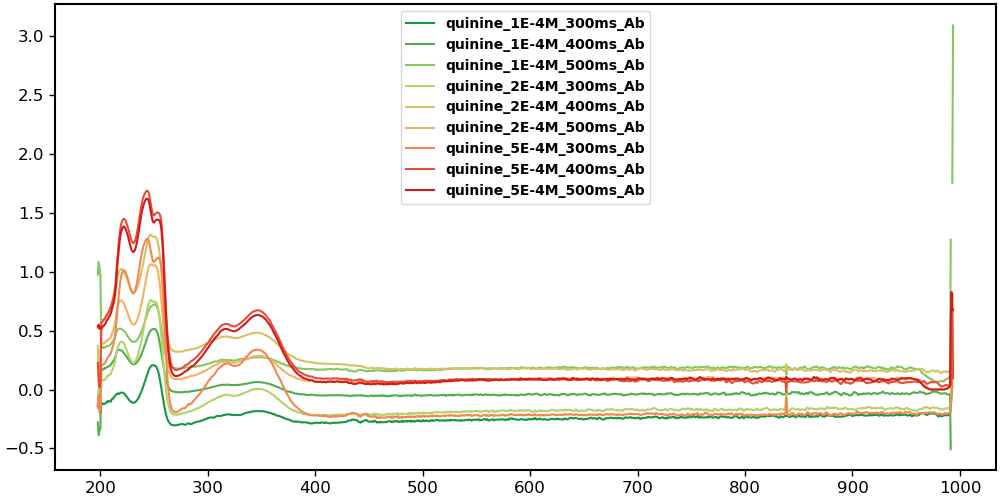

In [21]:
f2, ax2 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [22]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (x[idx1]-x[idx0])/(y[idx1]-y[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


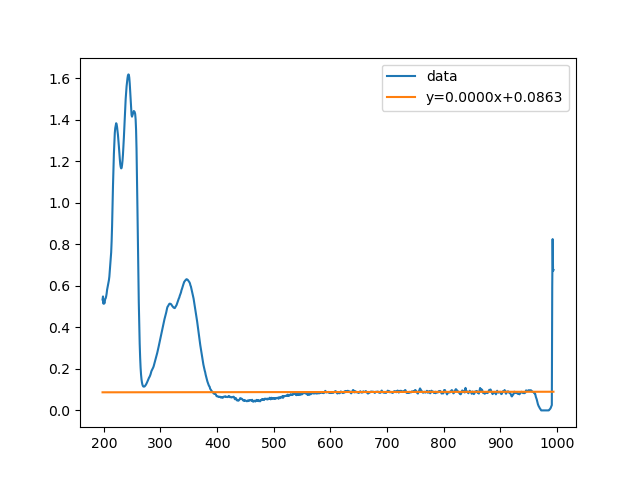

In [23]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[600, 900])

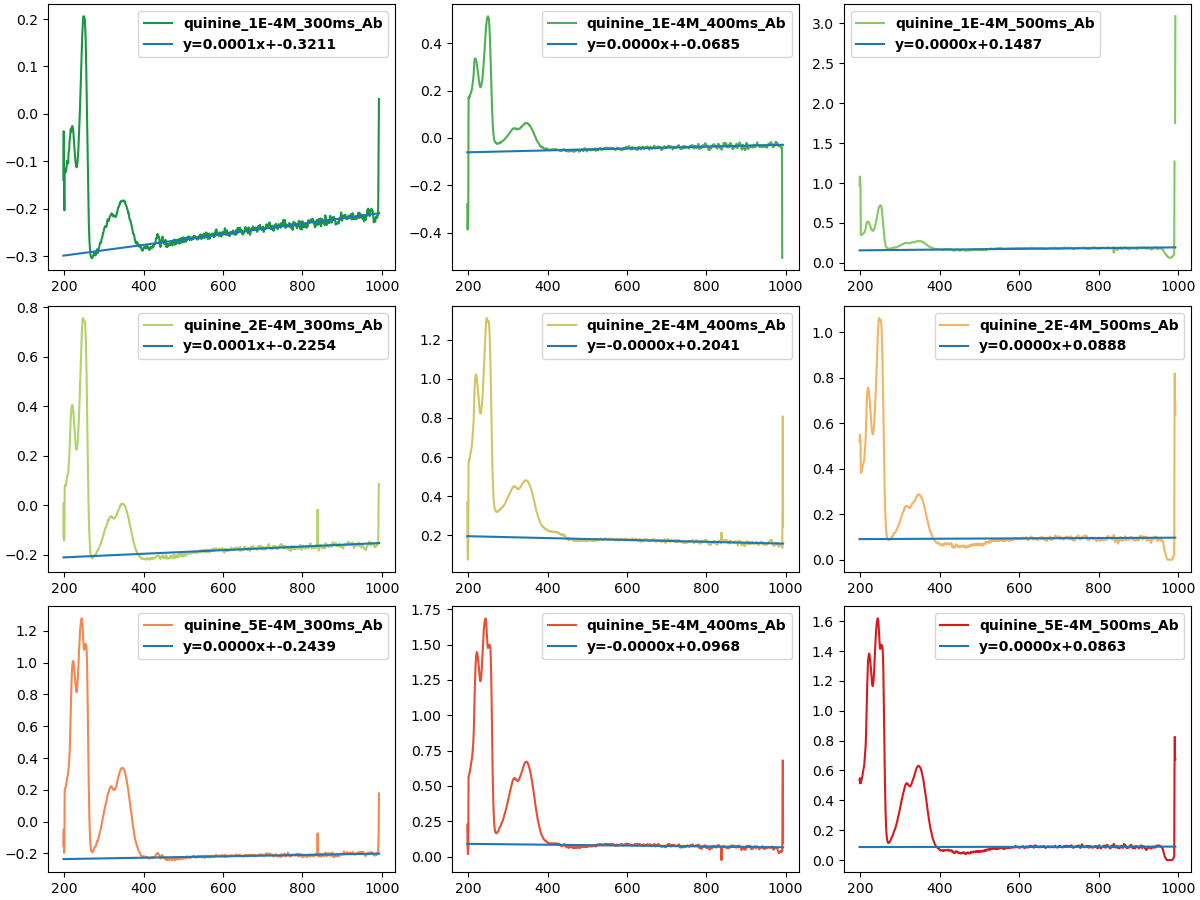

In [24]:
rows = 3
cols = 3
f3, ax3 = plt.subplots(rows, cols, figsize = (12, 9), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[400, 900], [400, 900], [400, 900], 
                [500, 900], [500, 900], [600, 800], 
                [400, 900], [400, 900], [600, 900]]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    x = df2[keys_list2[i*2]]
    y = df2[keys_list2[i*2+1]]
    popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[i], plot=False)
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
    ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
    
    df4[keys_list2[i*2]] = x
    # df4[keys_list2[i*2+1]] = y - popt[1]
    df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

## Plot Abs by offset

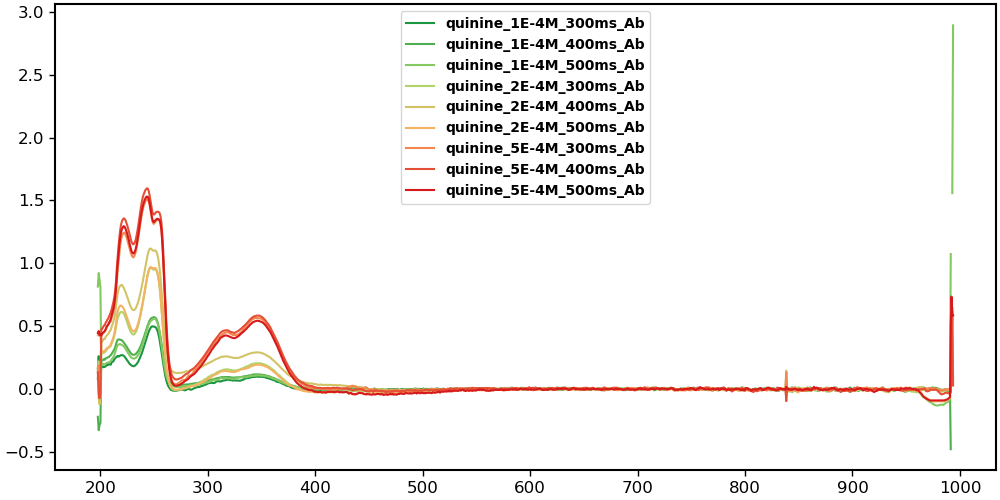

In [25]:
f4, ax4 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [26]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_1E-4M_300ms_Ab',
 '1E-4M_300ms_Ab',
 'x_1E-4M_400ms_Ab',
 '1E-4M_400ms_Ab',
 'x_1E-4M_500ms_Ab',
 '1E-4M_500ms_Ab',
 'x_2E-4M_300ms_Ab',
 '2E-4M_300ms_Ab',
 'x_2E-4M_400ms_Ab',
 '2E-4M_400ms_Ab',
 'x_2E-4M_500ms_Ab',
 '2E-4M_500ms_Ab',
 'x_5E-4M_300ms_Ab',
 '5E-4M_300ms_Ab',
 'x_5E-4M_400ms_Ab',
 '5E-4M_400ms_Ab',
 'x_5E-4M_500ms_Ab',
 '5E-4M_500ms_Ab']

## Save offset data as csv

In [27]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

quinine_1E-4M_300ms_Ab_offset.csv
quinine_1E-4M_400ms_Ab_offset.csv
quinine_1E-4M_500ms_Ab_offset.csv
quinine_2E-4M_300ms_Ab_offset.csv
quinine_2E-4M_400ms_Ab_offset.csv
quinine_2E-4M_500ms_Ab_offset.csv
quinine_5E-4M_300ms_Ab_offset.csv
quinine_5E-4M_400ms_Ab_offset.csv
quinine_5E-4M_500ms_Ab_offset.csv


## Save Absorbance at 365 nm

In [28]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i][:-4] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][::-2][::-1].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][::-2][::-1].to_list()
df_365

Data_source   Abs_365  Abs_offset_365
0  quinine_1E-4M_300ms_Abs_20230802-164205_b7ec46a3 -0.221344        0.058852
1  quinine_1E-4M_400ms_Abs_20230802-172331_7fc23daf  0.021235        0.075119
2  quinine_1E-4M_500ms_Abs_20230802-173342_d6d4df4a  0.237753        0.072198
3  quinine_2E-4M_300ms_Abs_20230802-165017_a3326354 -0.076407        0.122467
4  quinine_2E-4M_400ms_Abs_20230802-172621_e708e5a6  0.386289        0.199569
5  quinine_2E-4M_500ms_Abs_20230802-173631_d533d48b  0.206676        0.115021
6  quinine_5E-4M_300ms_Abs_20230802-165400_be41df07  0.128892        0.357053
7  quinine_5E-4M_400ms_Abs_20230802-172833_4090a498  0.461882        0.376390
8  quinine_5E-4M_500ms_Abs_20230802-173823_b5572a8a  0.428136        0.340616

In [29]:
# df_365.to_csv(os.path.join(new_dir, 'abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [30]:
# df_365.to_csv('050mM_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Compare dark and Ref saved in addtional scans

## Reading dark and reference

In [31]:
dark = glob.glob(cwd + '/Dark**.csv')
ref = glob.glob(cwd + '/H2SO4**.csv')

dark.sort()
ref.sort()

# subfolder_Cl.reverse()
# del subfolder[-1]
print(*dark, sep = '\n')  ## Print one element per line
print(*ref, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/Dark_300ms_Abs_20230802-163249_d7e58ed5.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/Dark_400ms_Abs_20230802-171957_1871d97b.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/Dark_500ms_Abs_20230802-173030_94a861c4.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/H2SO4_50mM_300ms_Abs_20230802-163255_d88ac7cd.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/H2SO4_50mM_400ms_Abs_20230802-172001_b6917e01.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/H2SO4_50mM_500ms_Abs_202

## Calculate Absorbance from additional Dark & Ref

In [32]:
skiprows = 7
df3 = pd.DataFrame()
id0 = 8
id1 = 22
for t in ['300ms', '400ms', '500ms']:
    for i in title:        
        for j in dark:
            for k in ref:
                if (t in i) and (t in j) and (t in k):
                    # print(t+'\n',i+'\n',os.path.basename(j)+'\n',os.path.basename(k)+'\n')
                    dark_df = pd.read_csv(j, skiprows=skiprows, sep=',')
                    ref_df = pd.read_csv(k, skiprows=skiprows, sep=',')
                    
                    # suffix = os.path.basename(subfolder_Abs[i])
                    suffix = i
                    df3[f'x_{suffix[id0:id1]}'] = df21[f'x_{suffix[id0:id1]}']
                    absorbance = -np.log10((df21[f'{suffix[id0:id1]}']-dark_df['Sample'])/(ref_df['Sample']-dark_df['Sample']))
                    df3[f'{suffix[id0:id1]}'] = absorbance

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


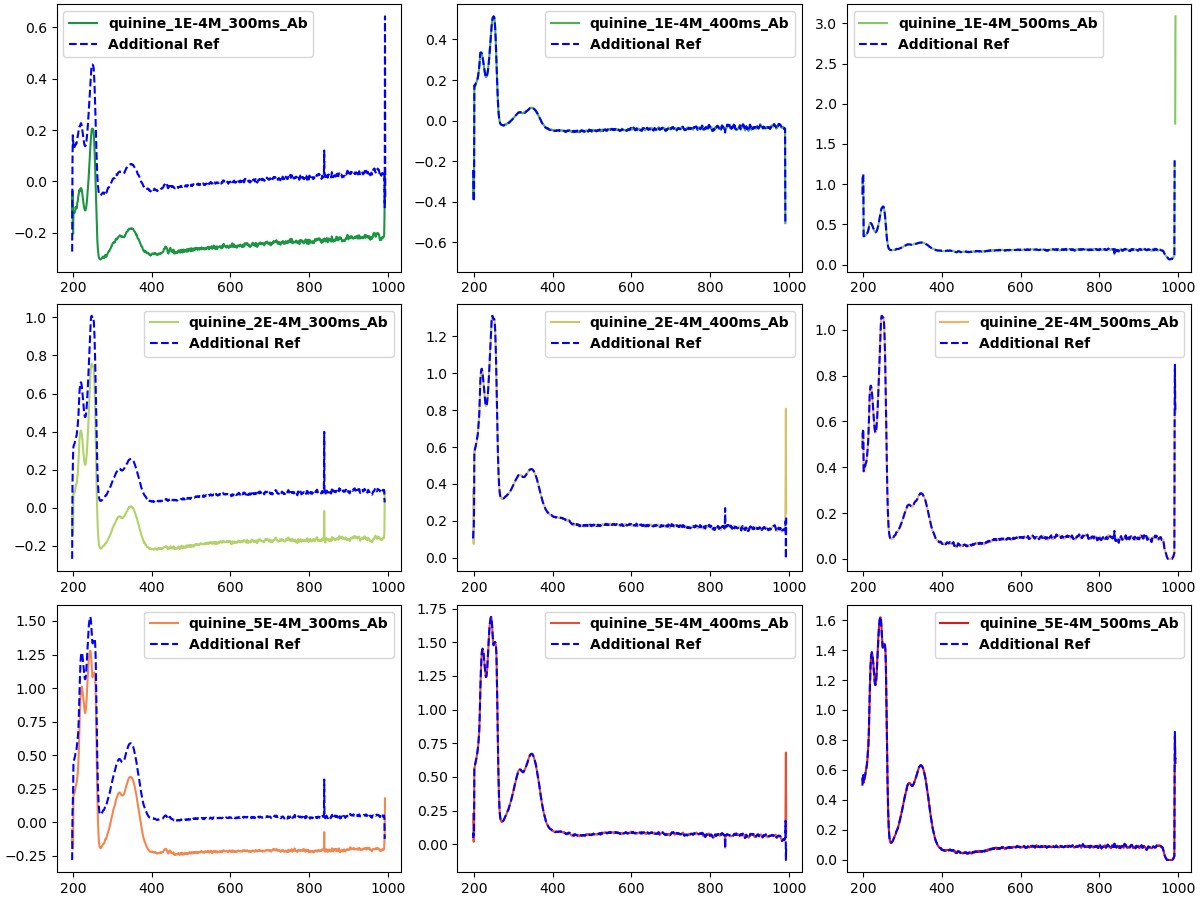

In [33]:
rows = 3
cols = 3
f31, ax31 = plt.subplots(rows, cols, figsize = (12, 9), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22

legend_properties = {'weight':'bold', 'size':10} 
for i in range(len(title)):
    # ax31.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    ax31[idx_ax[0][0], idx_ax[0][1]].plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
    ax31[idx_ax[0][0], idx_ax[0][1]].plot(df3[keys_list2[i*2]], df3[keys_list2[i*2+1]], 'b--', label='Additional Ref')

    ax31[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)

# ax31.set_xlim(-0.5, 20)
# ax31.set_ylim(2500, 9500)
# ax31.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax31.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax31.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax31.spines["bottom"].set_linewidth(spinewidth)
# ax31.spines["right"].set_linewidth(spinewidth)
# ax31.spines["top"].set_linewidth(spinewidth)
# ax31.spines["left"].set_linewidth(spinewidth)